# Import packages & install packages

In [13]:
!pip install pandas

DEPRECATION: Loading egg at c:\users\sywis\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\gym-0.26.2-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\sywis\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\gym_notices-0.0.8-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\sywis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import os
import pandas as pd
import numpy as np

# Load Dataset

In [3]:
current_directory = os.getcwd()
weather_data_path = os.path.join(current_directory, "weatherHistory.csv")
data  = pd.read_csv(weather_data_path)  
print(data .head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

# PCA Reduction

In [4]:
# Drop non-numeric columns
numeric_data = data.drop(columns=['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'])

# Handle missing values (e.g., drop rows with NaN)
numeric_data = numeric_data.dropna()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

## Using HW3 PCA Code

In [19]:
from pca import PCA
# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(scaled_data)

# Transform data to reduce dimensions (e.g., retain 2 principal components)
reduced_data = pca.transform(scaled_data, K=2)

print("Reduced Data Shape:", reduced_data.shape)

Reduced Data Shape: (96453, 2)


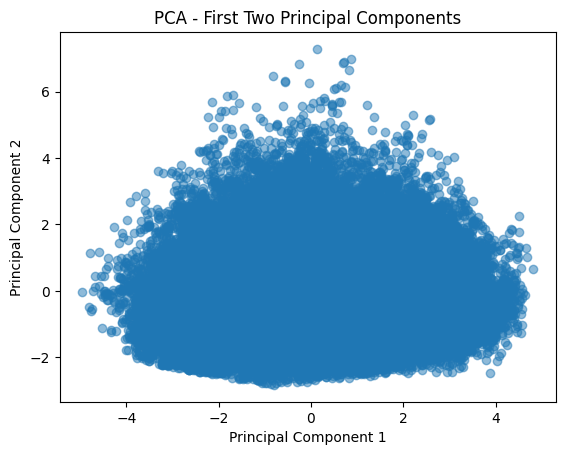

In [20]:
import matplotlib.pyplot as plt

# Scatter plot of the first two principal components
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [7]:
# Transform data while retaining 99% variance
reduced_data_rv = pca.transform_rv(scaled_data, retained_variance=0.99)

print("Reduced Data Shape with Retained Variance:", reduced_data_rv.shape)


Reduced Data Shape with Retained Variance: (96453, 6)


In [ ]:
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df.to_csv('weater data processed/reduced_weatherHistory.csv', index=False)

## PCA using Sklearn

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('weatherHistory.csv')

# Drop unnecessary columns
data = data.drop(columns=['Formatted Date', 'Daily Summary'])

# Handle missing values
data = data.dropna()

# Encode categorical variables
data = pd.get_dummies(data, columns=['Summary', 'Precip Type'], drop_first=True)

# Select numerical features
features = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
            'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Apply PCA
pca = PCA(n_components=2)  # Adjust n_components based on explained variance ratio
X_pca = pca.fit_transform(X_scaled)

# Save PCA-transformed data to CSV
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df.to_csv('weater data processed/PCA_weather_data.csv', index=False)
print("PCA-transformed data saved to 'PCA_weather_data.csv'.")

PCA-transformed data saved to 'PCA_weather_data.csv'.


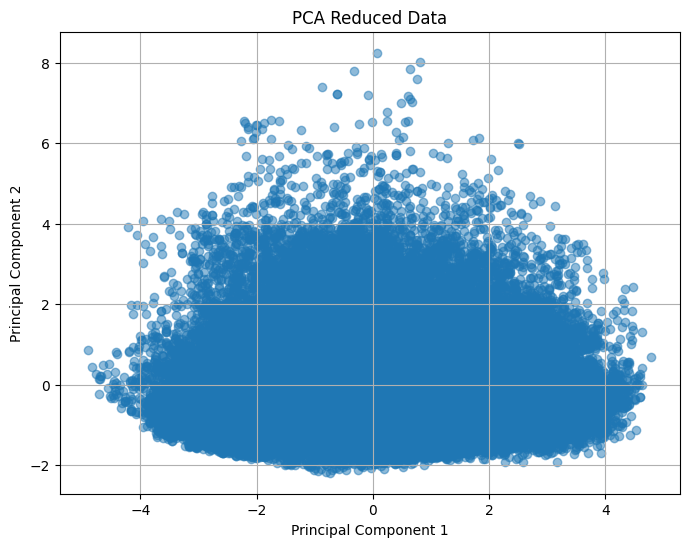

In [18]:
# Plot the PCA reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
